# Penambahan Kolom Order Month pada Dataset

In [1]:
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

Ada beberapa function yang berperan di sini:

* apply & lambda biasa digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal `.apply(lambda x: x*2)` berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja
* Function `datetime.datetime.strptime` digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.
* Function `strftime` digunakan untuk mengubah format suatu data bertipe datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti output-nya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada.

In [3]:
print(dataset.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


# Mini Project
Dengan menggunakan dataset yang sama ('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv'), buatlah sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.

Beberapa spesifikasi yang harus diperhatikan:

* Ukuran figure adalah 10x5
* Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019
* Sumbu-y adalah jumlah unique customers di tiap tanggal
* Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri

In [1]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Baca dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

In [3]:
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

Ada beberapa function yang berperan di sini:

* **apply** & **lambda** biasa digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda x: x*2) berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja
* Function `datetime.datetime.strptime` digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.
* Function `strftime`digunakan untuk mengubah format suatu data bertipe datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti output-nya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada. 

In [4]:
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

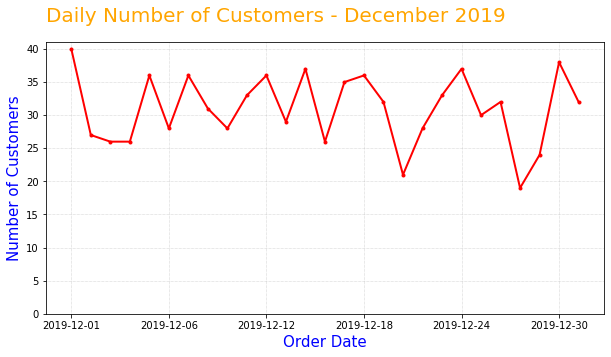

In [5]:
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()